### Notebook Overview

This Jupyter notebook is the deliverable for **Course 3 – "Go Beyond the Numbers: Translate Data into Insights"** in the *Google Advanced Data Analytics Professional Certificate* program. Its goals are to  

1. **Perform feature engineering** on the Waze churn dataset to create variables that better capture user behavior.  
2. **Handle outliers and data quality issues** through techniques such as capping extreme values at selected percentiles.  
3. **Visualize and compare engineered features** to identify patterns linked to user churn.  
4. **Summarize findings in an executive-style report (Milestone 3)** with key insights and recommendations that will inform predictive modeling in the next milestone.  

**Deliverables:**  
- Engineered dataset with capped and derived features  
- Visualizations highlighting churn-related patterns  
- Executive report summarizing insights and next steps  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the clean csv with added features into a dataframe
waze_df = pd.read_csv('../data/waze_features_v1.csv')
waze_df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778


In [3]:
# Check size
waze_df.size

228784

In [4]:
# Check for general info, dtypes, etc.
waze_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14299 entries, 0 to 14298
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14299 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14299 non-null  int64  
 3   drives                   14299 non-null  int64  
 4   total_sessions           14299 non-null  float64
 5   n_days_after_onboarding  14299 non-null  int64  
 6   total_navigations_fav1   14299 non-null  int64  
 7   total_navigations_fav2   14299 non-null  int64  
 8   driven_km_drives         14299 non-null  float64
 9   duration_minutes_drives  14299 non-null  float64
 10  activity_days            14299 non-null  int64  
 11  driving_days             14299 non-null  int64  
 12  device                   14299 non-null  object 
 13  km_per_drive             14197 non-null  float64
 14  km_per_driving_day    

In [5]:
# Get descriptive stats
waze_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14197.000000,13316.000000,13316.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530,233.937962,624.901950,10.051412
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835,618.091431,1063.347472,20.279879
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,1.008775,3.022063,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,33.038159,159.198988,1.650000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,73.966235,297.621133,4.133333
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,181.307906,592.816412,9.574405
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15777.426560,15420.234110,395.000000


In [6]:
# Check null values
waze_df.isna().sum()

ID                           0
label                        0
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
km_per_drive               102
km_per_driving_day         983
drives_per_driving_day     983
dtype: int64

In [7]:
# Check if NaNs come from missing data or from 0 in 'drives' / 'driving_days'

# Map derived column names to their denominator columns
checks = {
    'km_per_drive': 'drives',
    'km_per_driving_day': 'driving_days',
    'drives_per_driving_day': 'driving_days'
}

for derived_col, denom_col in checks.items():
    null_count = waze_df[derived_col].isna().sum()
    zero_count = (waze_df[denom_col] == 0).sum()
    print(f'{derived_col}: NaNs = {null_count}, Zeros in {denom_col} = {zero_count}')

km_per_drive: NaNs = 102, Zeros in drives = 102
km_per_driving_day: NaNs = 983, Zeros in driving_days = 983
drives_per_driving_day: NaNs = 983, Zeros in driving_days = 983


In [8]:
# Nulls are fine. Let's start to visualize for EDA.

## Sessions

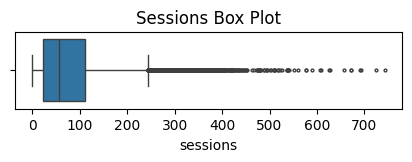

In [9]:
# Boxplot
plt.figure(figsize=(5, 1))
sns.boxplot(x='sessions', data=waze_df, fliersize=2)
plt.title('Sessions Box Plot')
plt.show()

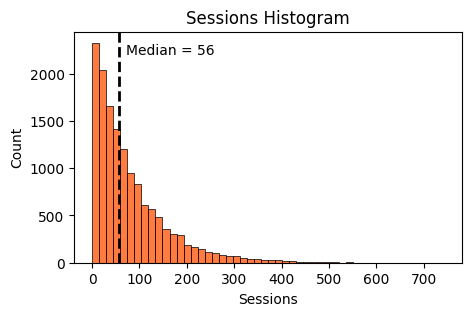

In [10]:
# Histogram
plt.figure(figsize=(5, 3))
sns.histplot(waze_df['sessions'], bins=50, kde=False, color='#FF4F00')

# Add median line
median_val = waze_df['sessions'].median()
plt.axvline(median_val, color='black', linestyle='--', linewidth=2)
plt.text(median_val+15, plt.ylim()[1]*0.9, f"Median = {median_val:.0f}", color='black')

plt.title('Sessions Histogram')
plt.xlabel('Sessions')
plt.ylabel('Count')
plt.show()

##### The `sessions` variable shows a clear right-skew. Half of the users had 56 or fewer sessions in the last month, but the box plot highlights a long tail — with some users logging well over 700 sessions.

## Drives

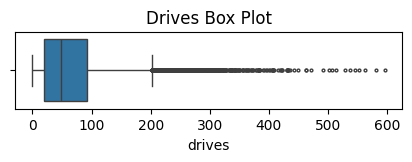

In [11]:
# Boxplot
plt.figure(figsize=(5, 1))
sns.boxplot(x='drives', data=waze_df, fliersize=2)
plt.title('Drives Box Plot')
plt.show()

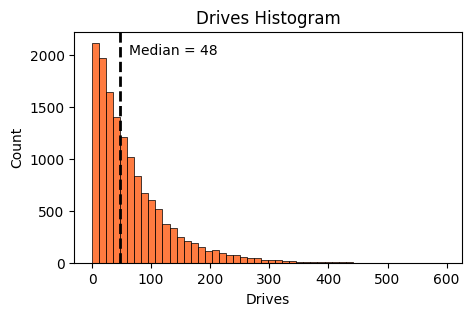

In [12]:
# Histogram
plt.figure(figsize=(5, 3))
sns.histplot(waze_df['drives'], bins=50, kde=False, color='#FF4F00')

# Add median line
median_val = waze_df['drives'].median()
plt.axvline(median_val, color='black', linestyle='--', linewidth=2)
plt.text(median_val+15, plt.ylim()[1]*0.9, f"Median = {median_val:.0f}", color='black')

plt.title('Drives Histogram')
plt.xlabel('Drives')
plt.ylabel('Count')
plt.show()

##### The distribution of `drives` looks very similar to `sessions`: right-skewed and roughly log-normal. The median is 48 drives, though a few users recorded more than 400, underscoring how uneven engagement can be.

## Total Sessions

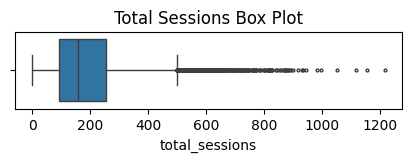

In [13]:
# Boxplot
plt.figure(figsize=(5, 1))
sns.boxplot(x='total_sessions', data=waze_df, fliersize=2)
plt.title('Total Sessions Box Plot')
plt.show()

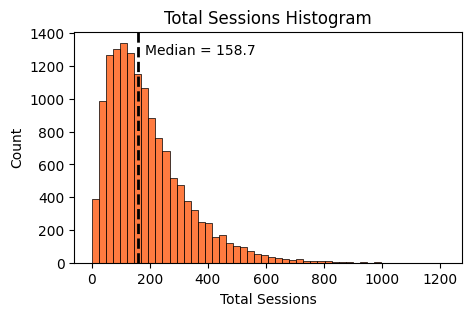

In [14]:
# Histogram
plt.figure(figsize=(5, 3))
sns.histplot(waze_df['total_sessions'], bins=50, kde=False, color='#FF4F00')

# Add median line
median_val = waze_df['total_sessions'].median()
plt.axvline(median_val, color='black', linestyle='--', linewidth=2)
plt.text(median_val+25, plt.ylim()[1]*0.9, f"Median = {median_val:.1f}", color='black')

plt.title('Total Sessions Histogram')
plt.xlabel('Total Sessions')
plt.ylabel('Count')
plt.show()

##### `total_sessions` is also right-skewed, with a median of about 159. What’s interesting is that the median number of sessions in just the last month was 56 — more than a third of the estimated lifetime total. That suggests a substantial share of usage may be concentrated in the most recent month, something worth digging into further.

## Number of day since user signed up for the app

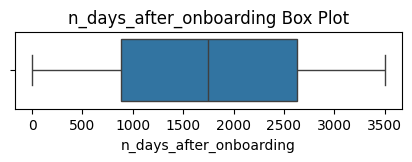

In [15]:
# Boxplot
plt.figure(figsize=(5, 1))
sns.boxplot(x='n_days_after_onboarding', data=waze_df, fliersize=2)
plt.title('n_days_after_onboarding Box Plot')
plt.show()

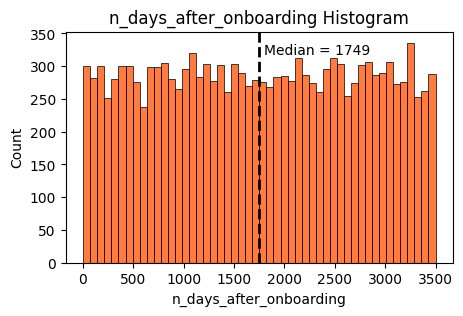

In [16]:
# Histogram
plt.figure(figsize=(5, 3))
sns.histplot(waze_df['n_days_after_onboarding'], bins=50, kde=False, color='#FF4F00')

# Add median line
median_val = waze_df['n_days_after_onboarding'].median()
plt.axvline(median_val, color='black', linestyle='--', linewidth=2)
plt.text(median_val+50, plt.ylim()[1]*0.9, f"Median = {median_val:.0f}", color='black')

plt.title('n_days_after_onboarding Histogram')
plt.xlabel('n_days_after_onboarding')
plt.ylabel('Count')
plt.show()

##### User tenure (days since onboarding) is essentially uniform, ranging from near zero to ~3,500 days (~9.5 years).

## Total kilometers driven

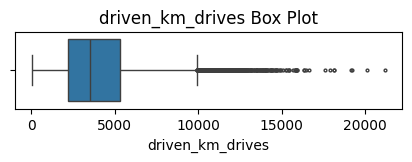

In [17]:
# Boxplot
plt.figure(figsize=(5, 1))
sns.boxplot(x='driven_km_drives', data=waze_df, fliersize=2)
plt.title('driven_km_drives Box Plot')
plt.show()

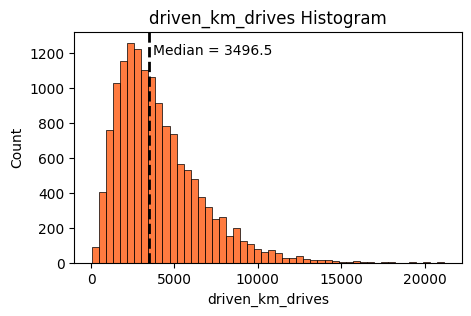

In [18]:
# Histogram
plt.figure(figsize=(5, 3))
sns.histplot(waze_df['driven_km_drives'], bins=50, kde=False, color='#FF4F00')

# Add median line
median_val = waze_df['driven_km_drives'].median()
plt.axvline(median_val, color='black', linestyle='--', linewidth=2)
plt.text(median_val+250, plt.ylim()[1]*0.9, f"Median = {median_val:.1f}", color='black')

plt.title('driven_km_drives Histogram')
plt.xlabel('driven_km_drives')
plt.ylabel('Count')
plt.show()

##### Monthly distance driven is heavily right-skewed. Half of users drove fewer than ~3,500 km, but some logged extreme totals — with the max exceeding half the Earth’s circumference.

## Total duration driven (in minutes)

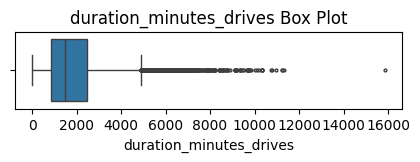

In [19]:
# Boxplot
plt.figure(figsize=(5, 1))
sns.boxplot(x='duration_minutes_drives', data=waze_df, fliersize=2)
plt.title('duration_minutes_drives Box Plot')
plt.show()

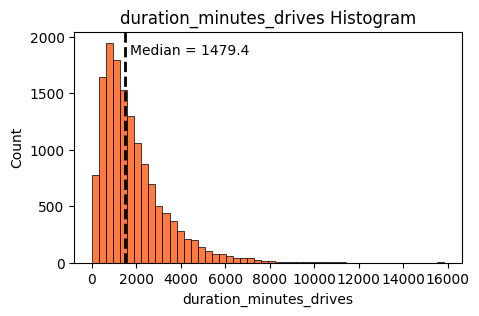

In [20]:
# Histogram
plt.figure(figsize=(5, 3))
sns.histplot(waze_df['duration_minutes_drives'], bins=50, kde=False, color='#FF4F00')

# Add median line
median_val = waze_df['duration_minutes_drives'].median()
plt.axvline(median_val, color='black', linestyle='--', linewidth=2)
plt.text(median_val+250, plt.ylim()[1]*0.9, f"Median = {median_val:.1f}", color='black')

plt.title('duration_minutes_drives Histogram')
plt.xlabel('duration_minutes_drives')
plt.ylabel('Count')
plt.show()

##### `duration_minutes_drives` also has a long right tail: half of users drove under ~1,500 minutes (~25 hours) in the last month, while a few outliers exceeded 250 hours.

## Number of Days User Opens App

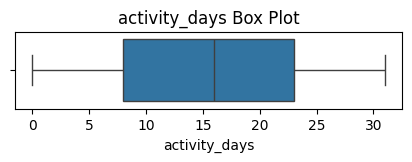

In [21]:
# Boxplot
plt.figure(figsize=(5, 1))
sns.boxplot(x='activity_days', data=waze_df, fliersize=2)
plt.title('activity_days Box Plot')
plt.show()

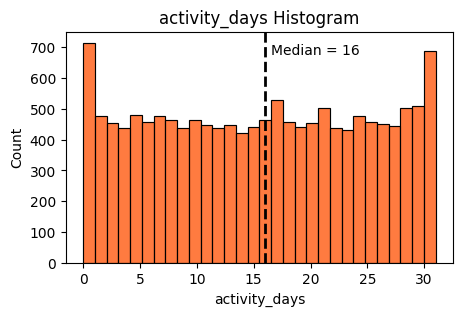

In [22]:
# Histogram
plt.figure(figsize=(5, 3))
sns.histplot(waze_df['activity_days'], bins=30, kde=False, color='#FF4F00')

# Add median line
median_val = waze_df['activity_days'].median()
plt.axvline(median_val, color='black', linestyle='--', linewidth=2)
plt.text(median_val+0.5, plt.ylim()[1]*0.9, f"Median = {median_val:.0f}", color='black')

plt.title('activity_days Histogram')
plt.xlabel('activity_days')
plt.ylabel('Count')
plt.show()

##### Users opened the app a median of 16 days last month. The histogram is nearly uniform at ~500 users per day count, with ~250 who never opened the app and ~250 who opened it daily. This pattern doesn’t align neatly with the `sessions` distribution, which is worth noting.

## Driving Days

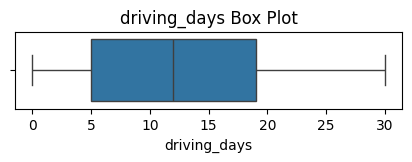

In [23]:
# Boxplot
plt.figure(figsize=(5, 1))
sns.boxplot(x='driving_days', data=waze_df, fliersize=2)
plt.title('driving_days Box Plot')
plt.show()

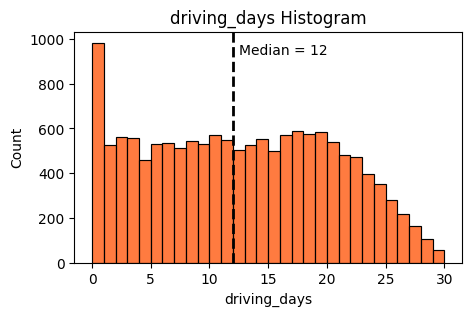

In [24]:
# Histogram
plt.figure(figsize=(5, 3))
sns.histplot(waze_df['driving_days'], bins=30, kde=False, color='#FF4F00')

# Add median line
median_val = waze_df['driving_days'].median()
plt.axvline(median_val, color='black', linestyle='--', linewidth=2)
plt.text(median_val+0.5, plt.ylim()[1]*0.9, f"Median = {median_val:.0f}", color='black')

plt.title('driving_days Histogram')
plt.xlabel('driving_days')
plt.ylabel('Count')
plt.show()

##### `driving_days` is close to uniform and tracks with `activity_days`, but with a steeper drop-off on the right. Nearly 1,000 users didn’t drive at all (vs. ~550 who didn’t open the app). This mismatch between driving and app activity deserves further investigation.

## Device Distribution

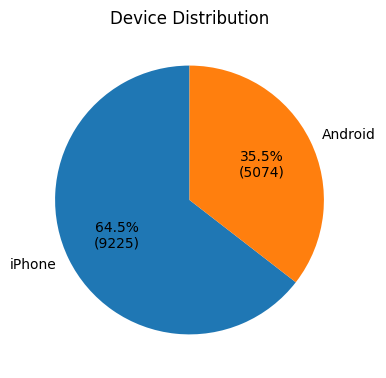

In [25]:
# Pie Chart
plt.figure(figsize=(4, 4))

device_counts = waze_df['device'].value_counts()

def autopct_format(values):
    def inner_autopct(pct):
        count = int(round(pct/100.*sum(values)))
        return f"{pct:.1f}%\n({count})"
    return inner_autopct

plt.pie(device_counts,
        labels=device_counts.index,
        autopct=autopct_format(device_counts),
        startangle=90)

plt.title('Device Distribution')
plt.tight_layout()
plt.show()

## Retained / Churned Distribution

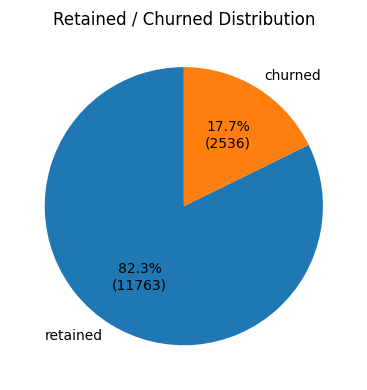

In [26]:
# Pie Chart
plt.figure(figsize=(4, 4))

label_counts = waze_df['label'].value_counts()

plt.pie(label_counts,
        labels=label_counts.index,
        autopct=autopct_format(label_counts),
        startangle=90)

plt.title('Retained / Churned Distribution')
plt.tight_layout()
plt.show()

## Driving Days vs. Activity Days

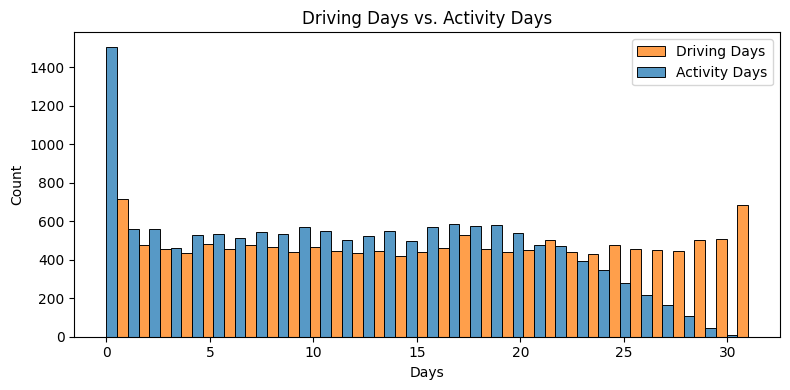

In [27]:
plt.figure(figsize=(8,4))

sns.histplot(waze_df[['driving_days','activity_days']], bins=30, multiple='dodge')

plt.title('Driving Days vs. Activity Days')
plt.xlabel('Days')
plt.ylabel('Count')
plt.legend(['Driving Days','Activity Days'])
plt.tight_layout()
plt.show()

##### The overlap between `driving_days` and `activity_days` isn’t perfect. More people didn’t drive at all than didn’t open the app at all. Users may open Waze for reasons other than driving (checking traffic, routes, settings, or even by mistake). Still, the mismatch is noticeable, and it may be worth checking with the Waze data team, especially since the "days in month" counts don’t fully align between variables.

In [28]:
# Let's confirm the number of days in both columns

print(max(waze_df['driving_days']))
print(max(waze_df['activity_days']))

30
31


##### It seems unlikely that none of ~15,000 users drove all 31 days, which raises questions about the consistency of these variables. A simple scatter plot of `driving_days` (x-axis) vs. `activity_days` (y-axis) helps check their relationship directly. If they’re aligned, points should cluster close to the diagonal; if not, it may highlight data quality issues.

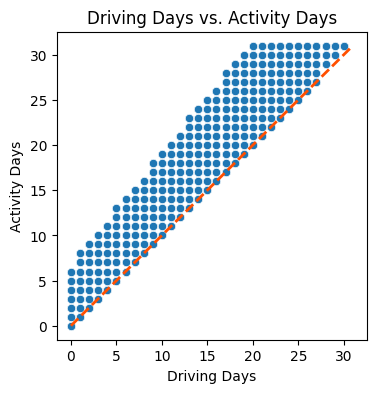

In [29]:
# Scatter Plot
plt.figure(figsize=(4,4))
sns.scatterplot(x='driving_days', y='activity_days', data=waze_df)

# Reference line y = x
max_days = max(waze_df['driving_days'].max(), waze_df['activity_days'].max())
plt.plot([0, max_days], [0, max_days], color='#FF4F00', linestyle='--', linewidth=2, label='y = x')

plt.title('Driving Days vs. Activity Days')
plt.xlabel('Driving Days')
plt.ylabel('Activity Days')
plt.show()

##### Driving days can never exceed activity days, since every drive implies app use. The scatter shows no violations of this rule, which is a good validity check.

## Retention by Device

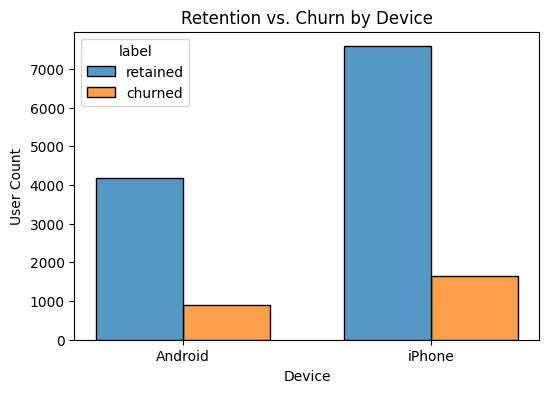

In [30]:
plt.figure(figsize=(6,4))

sns.histplot(
    data=waze_df, 
    x='device', 
    hue='label', 
    multiple='dodge',
    shrink=0.7
)

plt.title('Retention vs. Churn by Device')
plt.xlabel('Device')
plt.ylabel('User Count')
plt.show()

##### The proportion of churned users to retained users is consistent between device types.

## Retention by kilometers driven per driving day

In [31]:
# We saw earlier that churned users drove a median of 523 km per driving day last month, compared to 273 km for retained users 
waze_df.groupby('label').median(numeric_only=True)[['km_per_driving_day']]

,km_per_driving_day
label,
churned,523.086749
retained,272.628549


In [32]:
# Let's look at the overall distribution of km_per_driving_day:
waze_df['km_per_driving_day'].describe()

count    13316.000000
mean       624.901950
std       1063.347472
min          3.022063
25%        159.198988
50%        297.621133
75%        592.816412
max      15420.234110
Name: km_per_driving_day, dtype: float64

In [33]:
# The maximum value is 15,420 km per driving day, which is not physically realistic. Even at 100 km/hour for 12 hours, the upper bound would be ~1,200 km/day. 
# It’s highly unlikely many users averaged more than that, so we’ll exclude rows above 1,200 km/day as outliers.
# Next, let's plot a histogram of the cleaned km_per_driving_day column. 

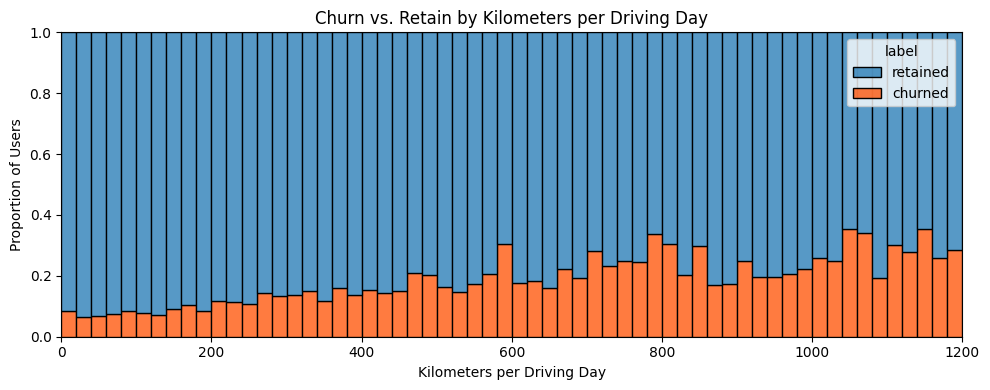

In [34]:
# Histogram
plt.figure(figsize=(10,4))

# Filter out unrealistic values (>1200 km/day)
df_clean = waze_df[waze_df['km_per_driving_day'] <= 1200]

sns.histplot(
    data=df_clean,
    x='km_per_driving_day',
    hue='label',                        # churned vs retained
    bins=range(0, 1201, 20),            # 0–1200 in steps of 20
    multiple='fill',                    # normalize so each bar = 100%
    palette=['#1f77b4', '#FF4F00']      # retain = blue, churn = orange
)

plt.title('Churn vs. Retain by Kilometers per Driving Day')
plt.xlabel('Kilometers per Driving Day')
plt.ylabel('Proportion of Users')       # since multiple='fill' makes y-axis fractions
plt.tight_layout()
plt.show()

##### Churn rates increase as average daily driving distance goes up. This suggests that long-distance users may be at higher risk of discontinuing the app, and it’s worth investigating what drives this behavior.

## Churn rate per number of driving days


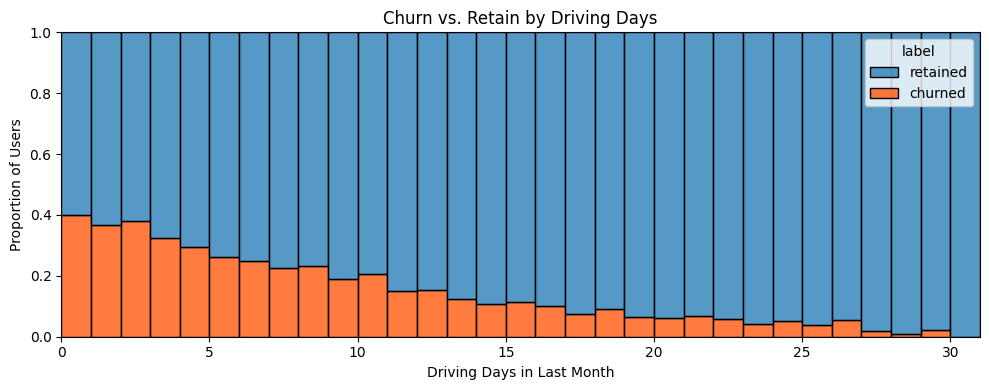

In [35]:
# Histogram
plt.figure(figsize=(10,4))

sns.histplot(
    data=waze_df,
    x='driving_days',
    hue='label',                        # churned vs retained
    bins=range(0, 32, 1),               # 0–31 days
    multiple='fill',                    # normalize so each bar = 100%
    palette=['#1f77b4', '#FF4F00']  # retain = blue, churn = orange
)

plt.title('Churn vs. Retain by Driving Days')
plt.xlabel('Driving Days in Last Month')
plt.ylabel('Proportion of Users')
plt.tight_layout()
plt.show()

##### Churn is most common among users who barely engaged with the app in the last month. Roughly 40% of those with zero activity days churned, while none of the users who opened the app all 30 days churned. This pattern makes sense: high-frequency users are unlikely to leave unless something about the product drives dissatisfaction. In contrast, churn among low-activity users may reflect earlier dissatisfaction, but it could also indicate that they simply no longer need a navigation app (for example: app user moves to a city and now uses public transportation).

## Proportion of sessions that occurred in the last month


In [36]:
# Create new column
waze_df['percent_sessions_in_last_month'] = (waze_df['sessions'] / waze_df['total_sessions']) * 100
waze_df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,95.367025
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,40.685648
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,84.118609
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,72.496767
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,49.926590


In [37]:
# Check median value
print(waze_df['percent_sessions_in_last_month'].median())

42.43102549137284


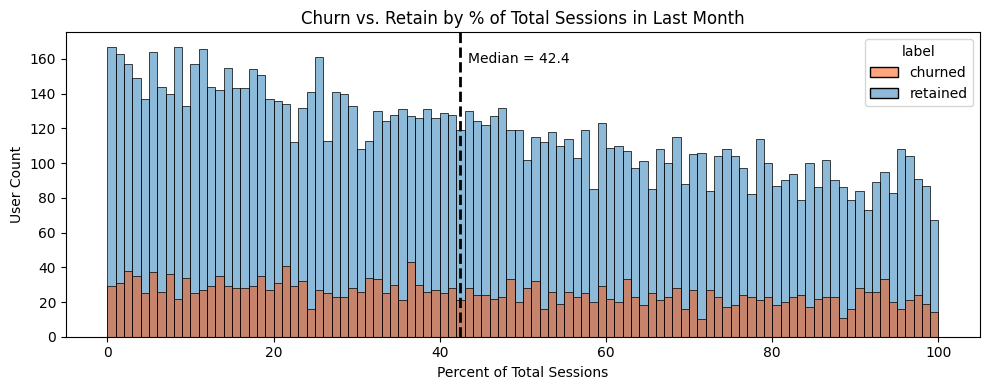

In [38]:
plt.figure(figsize=(10,4))

sns.histplot(
    data=waze_df,
    x='percent_sessions_in_last_month',
    hue='label',
    bins=range(0,101),
    multiple='layer',                   # overlay histograms
    hue_order=['churned', 'retained'],  # force order
    palette={'churned': '#FF4F00',    # churned = orange
             'retained': '#1f77b4'}   # retained = blue
)

median_val = waze_df['percent_sessions_in_last_month'].median()
plt.axvline(median_val, color='black', linestyle='--', linewidth=2)
plt.text(median_val+1, plt.ylim()[1]*0.9, f"Median = {median_val:.1f}", color='black')

plt.title('Churn vs. Retain by % of Total Sessions in Last Month')
plt.xlabel('Percent of Total Sessions')
plt.ylabel('User Count')
plt.tight_layout()
plt.show()

In [39]:
# Check the median of the number of days since a user signed up for the app
print(waze_df['n_days_after_onboarding'].median())

1749.0


In [40]:
1749 / 365

4.791780821917809

##### Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

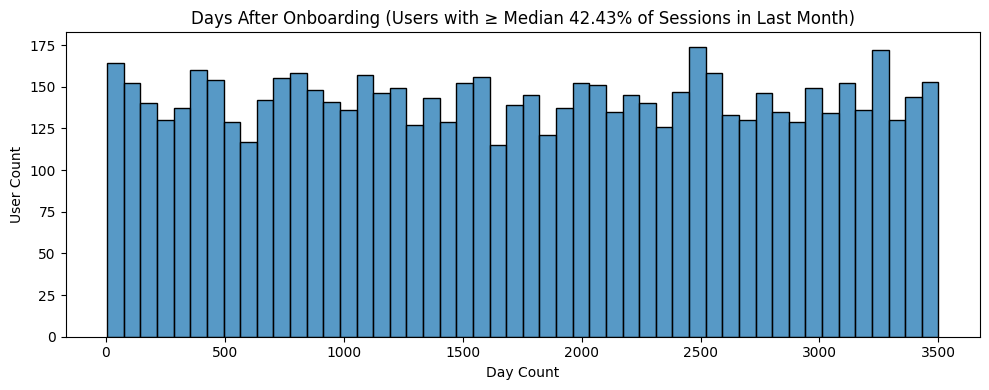

In [41]:
plt.figure(figsize=(10,4))

# Assign the median as the threshold
threshold = waze_df['percent_sessions_in_last_month'].median()

# Filter users by threshold
df_filtered = waze_df[waze_df['percent_sessions_in_last_month'] >= threshold]

# Plot histogram
sns.histplot(
    data=df_filtered,
    x='n_days_after_onboarding',
    bins=50,
    color='#1f77b4'
)

plt.title(f'Days After Onboarding (Users with ≥ Median {threshold:.2f}% of Sessions in Last Month)')
plt.xlabel('Day Count')
plt.ylabel('User Count')
plt.tight_layout()
plt.show()

##### For users with 42% or more of their total sessions concentrated in the last month, the distribution of days since onboarding looks uniform. That’s unusual. It may be worth asking Waze why such a large share of long-tenured users suddenly became highly active in just the most recent month.

## Handling Outliers with Percentile Capping

##### Several variables in this dataset have strong right-skew and contain outliers. These don’t appear to be data entry errors, but rather reflect the heavy-tailed nature of user activity.Depending on downstream modeling, it may be useful to cap extreme values at a chosen percentile to reduce their influence.

In [42]:
# Let's define a reusable function that caps values at the 95th percentile for any given column.

def cap_at_percentile_inplace(df, columns, percentile=0.95):
    """
    Cap values in given columns at the specified percentile, in place.
    Percentile should be a float between 0 and 1.
    """
    for col in columns:
        thr = df[col].quantile(percentile)
        df.loc[:, col] = df[col].clip(upper=thr)
        print(f"{col:>25} | {percentile*100:.0f}th pct = {thr:.2f}")

In [43]:
cols = ['sessions', 'drives', 'total_sessions',
        'driven_km_drives', 'duration_minutes_drives']

cap_at_percentile_inplace(waze_df, cols, percentile=0.95)

                 sessions | 95th pct = 243.00
                   drives | 95th pct = 200.00
           total_sessions | 95th pct = 455.44
         driven_km_drives | 95th pct = 8898.72
  duration_minutes_drives | 95th pct = 4668.18


In [44]:
waze_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14197.000000,13316.000000,13316.000000,14299.000000
mean,7503.573117,76.539688,63.964683,183.717304,1751.822505,121.747395,29.638296,3944.558631,1792.911210,15.544653,12.182530,233.937962,624.901950,10.051412,44.983669
std,4331.207621,67.243178,55.127927,118.720520,1008.663834,147.713428,45.350890,2218.358258,1224.329759,9.016088,7.833835,618.091431,1063.347472,20.279879,28.686297
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,1.008775,3.022063,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,33.038159,159.198988,1.650000,19.688992
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,73.966235,297.621133,4.133333,42.431025
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,181.307906,592.816412,9.574405,68.725073
max,14998.000000,243.000000,200.000000,455.439492,3500.000000,1236.000000,415.000000,8898.716275,4668.180092,31.000000,30.000000,15777.426560,15420.234110,395.000000,153.063707


In [45]:
# # Optional percentile cap if needed later
# waze_df.to_csv('../data/waze_features_95cap.csv', index=False)

## Conclusions

##### Analysis revealed that the overall churn rate is ~18%, and that this rate is consistent across iPhone and Android users. A notable anomaly is that many users concentrated a large share of their lifetime sessions in the most recent month; something to clarify with the Waze data team. 
##### EDA also showed a contrast: users who drive very long distances on driving days are more likely to churn, while users who drive more frequently across days are less likely to churn. Understanding why these patterns diverge is an opportunity for further investigation and a question to bring back to the data team.

In [ ]:
# Key Insights:
# Churn Rate: Roughly 17–18% of users churned, while ~82% were retained. Churn rates were consistent across device type (iPhone vs. Android).
# Distributions: Most variables are heavily right-skewed, meaning the majority of users fall at the lower end of usage ranges. Some variables,
#     such as user tenure (n_days_after_onboarding), are uniformly distributed, showing that users with both short and long tenure are equally represented.
# Outliers and Data Quality: While no variable appeared completely invalid, several contained improbable or impossible values.
#     Additionally, discrepancies between activity_days (max = 31) and driving_days (max = 30) suggest that data for these variables may not have been collected in the same month.

# Key Drivers of Churn:
# Users who drove long distances per driving day were more likely to churn.
# Users who drove on more days throughout the month were less likely to churn.
# This contrast highlights an opportunity for deeper investigation into different usage patterns.

# Emerging Questions:
# Why did so many long-tenured users suddenly concentrate a large share of their sessions in just the last month?
# Was this triggered by a product change, promotion, or external factor?
# Can the Waze data team confirm whether monthly variables were collected in the same period?

# Recommendation: 
# These findings provide a strong foundation for modeling churn, but follow-up with the data team is critical to clarify the apparent anomalies. 
#   Doing so will ensure the predictive model is trained on consistent and reliable inputs.

### Executive Summary
[Executive Summary - Milestone 3](../reports/executive_summary_milestone_3.pdf)